In [217]:
import os
import cv2 as cv
import numpy as np
from PIL import Image
import glob
import pandas as pd
from matplotlib import pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [120]:
data_folder = "../ai_ready"
image_folder = os.path.join(data_folder, "images")
mask_folder = os.path.join(data_folder, "masks")

In [121]:
df = pd.read_csv(os.path.join(data_folder, "x-ai_data.csv"))

In [212]:
df[df["class"]==0]

,filename,class,split
0,silos_256-0-0--6-15--152-30320.png,0,validation
1,silos_256-0-0--6-15--1195-31353.png,0,train
2,silos_256-0-0--6-15-283-30628.png,0,train
3,silos_256-0-0--6-15--339-30012.png,0,validation
4,silos_256-0-0--6-15--404-30011.png,0,train
...,...,...,...
994,silos_256-0-0--6-15--1107-30317.png,0,train
995,silos_256-0-0--6-15--1263-30674.png,0,train
996,silos_256-0-0--6-15-1495-30267.png,0,train
997,silos_256-0-0--6-15-852-30561.png,0,test


In [122]:
df_train = df[df["split"] == "train"]
df_test = df[df["split"] == "test"]

In [224]:
imgs = []

for filename in glob.glob(os.path.join(data_folder, "images/*.png")):
    imgs.append({"basename": os.path.basename(filename)})

for img in imgs:
    i = cv.imread(os.path.join(image_folder, img["basename"]))

    #convert the BGR image to HSV colour space
    hsv = cv.cvtColor(i, cv.COLOR_BGR2HSV)
    lower_green = np.array([0,150,0])
    upper_green = np.array([255,255,255])
    mask = cv.inRange(hsv, lower_green, upper_green)
    #perform bitwise and on the original image arrays using the mask
    res = cv.bitwise_and(i, i, mask=mask)

    img["image"] = Image.fromarray(res) #Image.open(os.path.join(image_folder, img["basename"])).convert('RGB')
    img["mask"]  = Image.open(os.path.join(mask_folder, img["basename"])).convert('RGB')
    img["silo"] = df.loc[df["filename"] == img["basename"]]["class"].iloc[0]

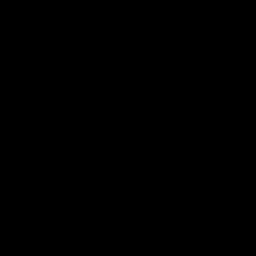

In [226]:
display(imgs[1102]["image"])

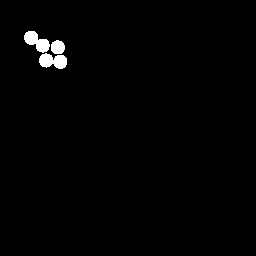

In [227]:
display(imgs[1102]["mask"])

Button(description='Next', style=ButtonStyle())

Button(description='Previous', style=ButtonStyle())

interactive(children=(FloatSlider(value=0.0, description='t', max=1998.0, step=1.0), Output()), _dom_classes=(…

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0, step=0.01), Output()), _dom_classes=('w…

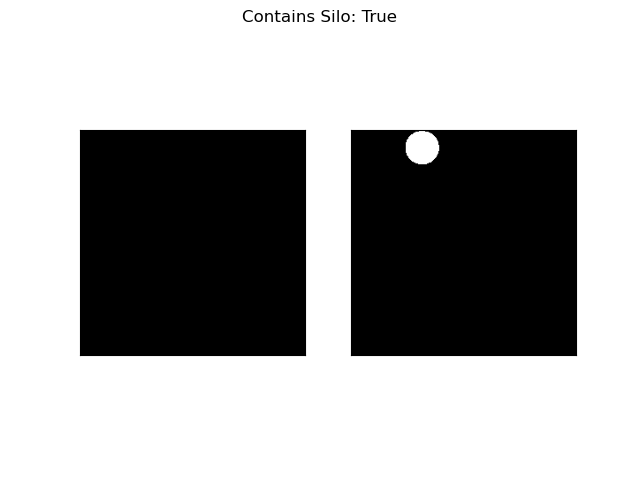

In [228]:
fig, ax = plt.subplots(1,2);
for a in ax:
    a.set_xticks([]);
    a.set_yticks([]);
    
class Img_plot:
    t = 0
    a = 0
    
    def basic(self):
        for a in ax:
            a.cla();
            a.set_xticks([]);
            a.set_yticks([]);

        fig.suptitle("Contains Silo: " + str(bool(imgs[self.t]["silo"])));
        ax[0].imshow(Image.blend(imgs[self.t]["image"], imgs[self.t]["mask"], self.a));
        ax[1].imshow(imgs[self.t]["mask"]);
        fig.canvas.draw_idle();
        
    def img_mask(self, t):
        self.t = int(t)
        self.basic()

    def img_overlay(self, a):
        self.a = a
        self.basic()
        
    def button_next(self):
        self.t += 1
        self.basic()
        
    def button_prev(self):
        self.t -= 1
        self.basic()
        
Plot = Img_plot();

button_next = widgets.Button(description="Next")
display(button_next)
button_next.on_click(Plot.button_next)  

button_prev = widgets.Button(description="Previous")
display(button_prev)
button_prev.on_click(Plot.button_prev)  
        
interact(Plot.img_mask, t = widgets.FloatSlider(value=int(0),
                                               min=int(0),
                                               max=len(imgs)-1,
                                               step=1));

interact(Plot.img_overlay, a = widgets.FloatSlider(value=0,
                                               min=0,
                                               max=1,
                                               step=0.01));

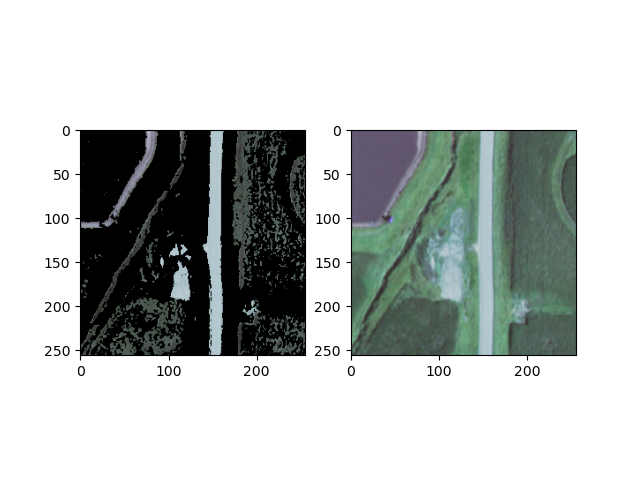

In [268]:
th = 45
t = 12

plt.close()

fig, ax = plt.subplots(1,2)

i = cv.imread(os.path.join(image_folder, imgs[t]["basename"]))

#convert the BGR image to HSV colour space
hsv = cv.cvtColor(i, cv.COLOR_BGR2HSV)
lower_green = np.array([0,th,0])
upper_green = np.array([255,255,255])
mask = cv.inRange(hsv, lower_green, upper_green)
#perform bitwise and on the original image arrays using the mask
res = cv.bitwise_and(i, i, mask=mask)

ax[0].imshow(i-res)
ax[1].imshow(i)
plt.show()